# 의사결정트리

decision tree는 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘이다.

#### 장점
- 모델의 추론 과정을 시각화하기 쉽다
- 데이터에서 중요한 특성이 무엇인지 쉽게 알아낼 수 있다
- 학습 및 예측 속도가 빠르다
- 다른 알고리즘에 비해 결과값이 왜, 어떻게 나왔는지 이해하기가 쉽다.

#### 단점
- 과대적합 되기 쉽다
- 조정해야 할 하이퍼파라미터가 많다

### 지니계수 
특징에 의한 분리가 이진 분류로 나타날 경우 지니 계수를 사용할 수 있다.

- 특징으로 분리된 두 노드의 지니 계수를 구함(P^2 + Q^2)
- 특징에 대한 지니 계수를 구함


In [1]:
import pandas as pd

# 데이터 수집

#### 컬럼 설명
- district: 행정 구역(서초구, 송파구 등)
- dong
- latitude: 위도
- longitude: 경도
- label: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭(강동,강서,강남,강북)

In [2]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

아래는 서울의 동 위치 데이터이다.  
동 정보는 테스트 시 사용한다.

In [3]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

### 학습 데이터의 레이블 분포

In [4]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_df.label.value_counts()

Gangdong    5
Gangnam     5
Gangbuk     5
Gangseo     5
Name: label, dtype: int64

### 테스트 데이터의 레이블 분포

In [5]:
test_df.label.value_counts()

Gangdong    5
Gangnam     5
Gangbuk     5
Gangseo     5
Name: label, dtype: int64

# 데이터 시각화

In [6]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


Text(0.5, 1.0, 'district visualization in 2d plane')

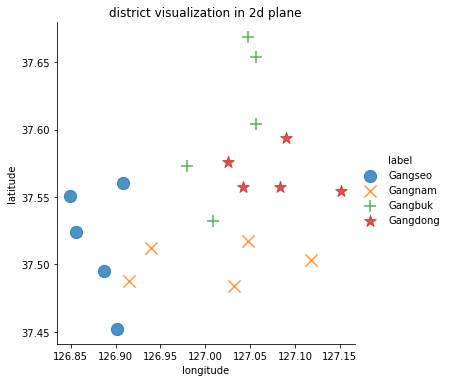

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='longitude', y='latitude', 
        data=train_df, fit_reg=False, 
        scatter_kws={'s':150},
        markers=['o','x','+','*'],
        hue='label')

# title 
plt.title('district visualization in 2d plane')

### 데이터 다듬기
학습에 필요없는 특징을 데이터에서 제거한다. 구 이름과 동 이름은 학습과 테스트에 필요하지 않으므로 제거한다.

In [8]:
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'], axis=1, inplace=True)

X_train = train_df[['longitude','latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

# 모델 학습

사이킷런의 의사결정 트리를 로드해서 학습한다.

In [9]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train.values.ravel())
clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)

### 시각화

In [10]:
def display_decision_surface(clf, X, y):
    
    # 차트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = 'rywb'
    plot_step = 0.001

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), 
                         np.arange(y_min, y_max, plot_step)) # meshgrid: x값과 y값의 배열로 직사각형 격자를 만들어냄
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu) # contourf: 등고선, cmap: color map
    
    
    # 학습 데이터를 차트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y==i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
                   c=color, label=le.classes_[i],
                   cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    
    # 차트 제목
    plt.title('Decision surface of a decision tree', fontsize=16)
    # 차트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fontsize=14)
    # x축 이름과 폰트 크기
    plt.xlabel('longitude', fontsize=16)
    # y축 이름과 폰트 크기
    plt.ylabel('latitude', fontsize=16)
    # 차트 크기 설정
    plt.rcParams['figure.figsize']=(7,5)
    # 차트 폰트 크기 설정
    plt.rcParams['font.size']=14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams['xtick.labelsize']=14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams['ytick.labelsize']=14
    
    plt.show()

## 파라미터 없이 학습한 모델의 결정 표면 시각화

decision tree는 과대적합 되기 상당히 쉬운 모델이다. 
사이킷런의 의사결정 트리는 과대 적합을 피할 수 있도록 별도의 파라미터를 제공하고 있지만 
특별히 파라미터를 설정하지 않을 경우 모델은 학습되지만 과대적합 될 가능성이 높다.

아래 예제는 아무런 파라미터 설정 없이 학습 데이터를 학습한 decision tree의 결정 표면을 시각화한다.


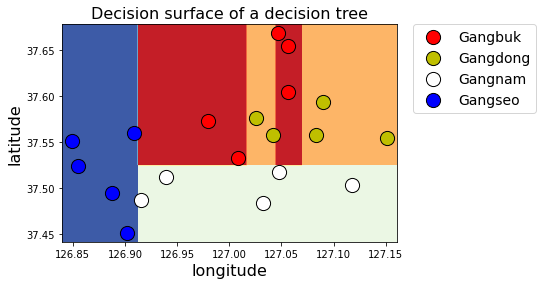

In [11]:
display_decision_surface(clf, X_train, y_encoded)

## 파라미터 설정한 모델의 결정 표면 시각화

- max_depth: 트리의 최대 한도 깊이
- min_samples_split: 자식 노드를 갖기 위한 최소한의 데이터 개수
- min_samples_leaf: 리프 노드의 최소 데이터 개수
- random_state: 동일한 정수를 입력했을 때 학습 결과를 항상 같게 만들어주는 파라미터


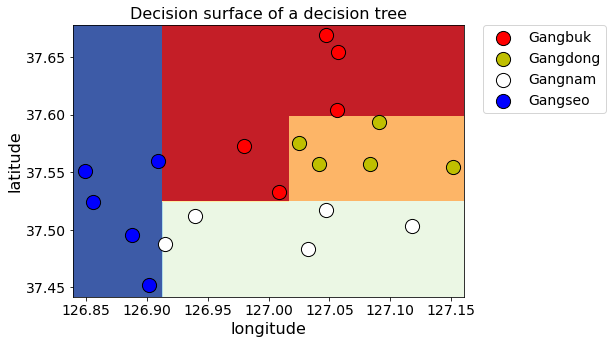

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=4,
                                  min_samples_split=2,
                                  min_samples_leaf=2,
                                  random_state=70).fit(X_train, y_encoded)
display_decision_surface(clf, X_train, y_encoded)

# 의사결정트리 시각화

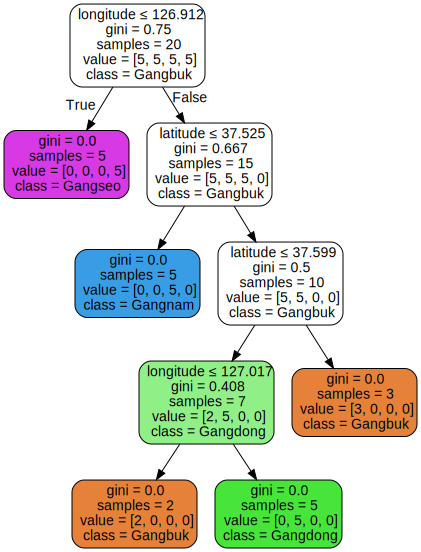

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('seoul')
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)
graph

- gini: 불순도 척도. 0일 경우 모든 샘플이 하나의 레이블을 가지며, 1에 가까울수록 여러 레이블이 한 노드에 존재함
- samples: 노드 안에 들어있는 데이터의 개수
- value: 레이블별 데이터의 개수
- class: 레이블

# 모델 테스트

In [16]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

In [17]:
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), le.classes_[pred])))

accuracy : 1.0


In [19]:
comparison = pd.DataFrame({'prediction': le.classes_[pred], 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
